In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
from sklearn.metrics import classification_report

## №1
Загрузить файл hr.csv

In [2]:
#Загружаем файл датасета
df=pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.info()
#проверка на нулевые значения. Их нет, значит ничего удалять/заменять не нужно.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## №2
Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [4]:
df.describe()# среднее, стандартное отклонение,минимум, максимум, медиана

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
#ИЛИ ТАК
#Рассчитываем среднее(математическое ожидание) для всех колонок
#df.mean()
#Рассчитываем медиану для всех колонок
#df.median()
#Рассчитываем min для всех колонок
#df.min()
#Рассчитываем max для всех колонок
#df.max()
#Рассчитываем стандартное отклонение для всех колонок
#statistics.pstdev(df['satisfaction_level'])
#statistics.mode(df['satisfaction_level'])

#Рассчитываем моду(самое часто встречаемое значение) для всех колонок
df.mode()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


## №3
Рассчитать и визуализировать корреляционную матрицу для переменных

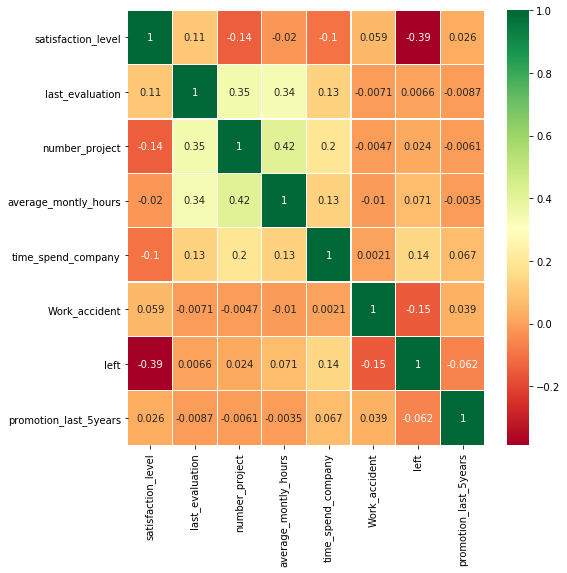

In [6]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

## №4
Визуализировать несколько взаимосвязей между переменными

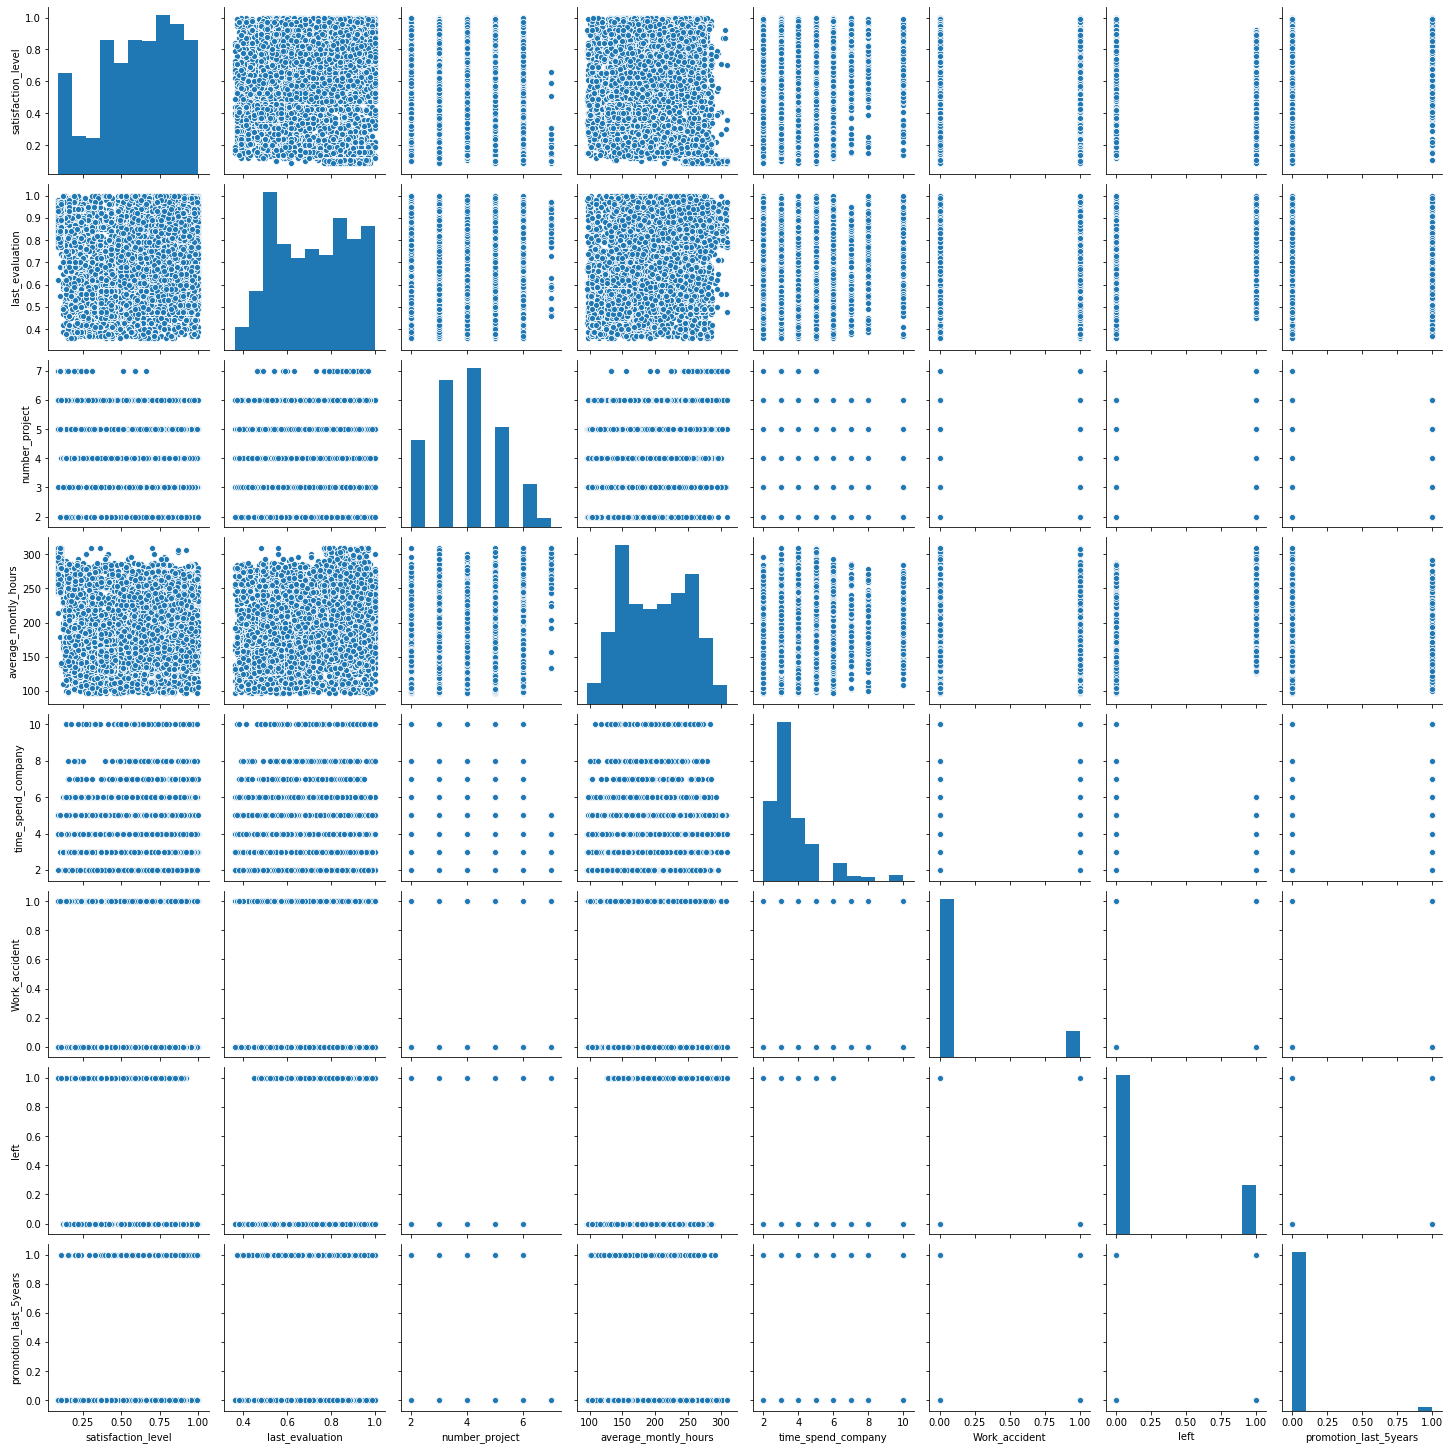

In [7]:
#Точечтные графики зависимостей переменных. Сильных зависимостей нет(это и видно по матрице корреляций и по коэффициентам)
sns.pairplot(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002094A2E3D88>,
      dtype=object)

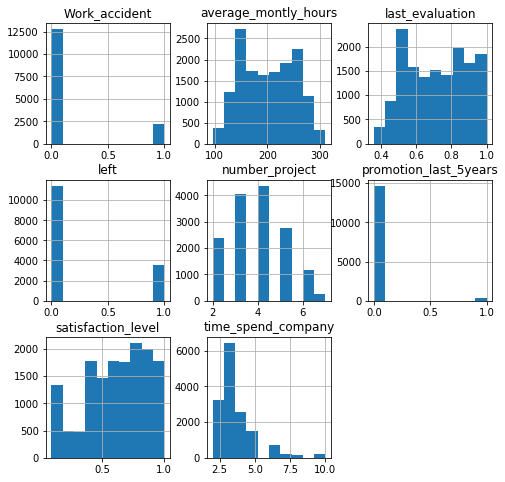

In [8]:
df.hist(figsize=(8,8))

<BarContainer object of 14999 artists>

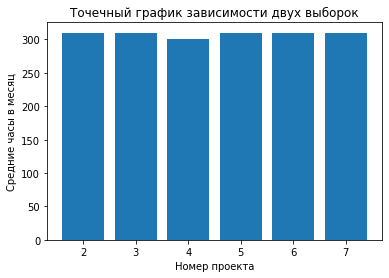

In [9]:
#по визуальной таблице корреляций у данных двух переменных самая максимальная зависимость из всех у средних часов в месяц и номера проекта
plt.xlabel('Номер проекта')
plt.ylabel('Средние часы в месяц')
plt.title('Точечный график зависимости двух выборок')
plt.bar(df['number_project'],df['average_montly_hours'])

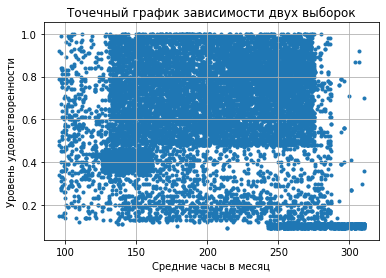

In [10]:
#Взаимосвязь уровня удовлетворенности и средних рабочих часов в месяц 
plt.xlabel('Средние часы в месяц')
plt.ylabel('Уровень удовлетворенности')
plt.title('Точечный график зависимости двух выборок')
plt.grid(True)
plt.scatter(df['average_montly_hours'],df['satisfaction_level'], marker='.')
plt.show()
#Уровень удовлетворенности и средние часы в месяц тоже не связаны, если судить по графику

<BarContainer object of 14999 artists>

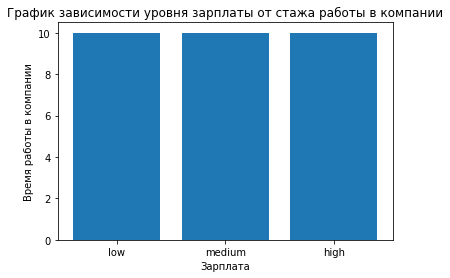

In [11]:
#взаимосвязь уровня зарплаты и стажа работы сотрудника
plt.xlabel('Зарплата')
plt.ylabel('Время работы в компании')
plt.title('График зависимости уровня зарплаты от стажа работы в компании')
plt.bar(df['salary'],df['time_spend_company'])
#зарплата не зависит от стажа работы в компании

Коэффициент корреляции Пирсона: 0.3397417998383591


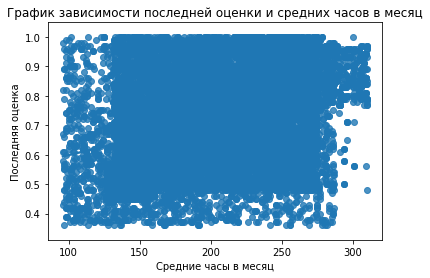

In [12]:
#Зависимость среднего количества часов работы в месяц и последней оценки сотрудника
from scipy.stats import pearsonr
y = df['last_evaluation']
x = df['average_montly_hours']
sns.regplot(x = x, y = y, data = df, fit_reg = True)
plt.xlabel('Средние часы в месяц')
plt.ylabel('Последняя оценка')
plt.title('График зависимости последней оценки и средних часов в месяц')
plt.grid(False)
corr, p_value = pearsonr(x,y)
print('Коэффициент корреляции Пирсона:', corr)
plt.show()
# Последняя оценка не зависит от средних часов в месяц по к. Пирсона

Коэффициент корреляции Пирсона: 0.1050212139714849


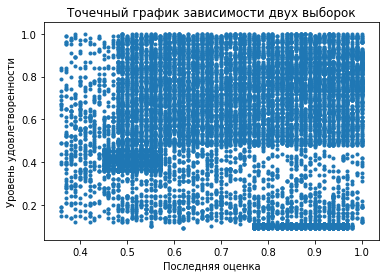

In [13]:
#Зависимость удовлетворенности и последней оценки сотрудника
x = df['last_evaluation']
y = df['satisfaction_level']
plt.title('Точечный график зависимости двух выборок')
plt.xlabel('Последняя оценка')
plt.ylabel('Уровень удовлетворенности')
corr, p_value = pearsonr(x,y )
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)
#Уровень удовлетворенности не зависит от последней оценки по к. Пирсона

In [14]:
from sklearn import preprocessing
data = df.iloc[:,:8]
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [15]:
#Нормализация данных
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(data)
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

,0,1,2,3,4,5,6,7
0,-0.362637,-0.46875,-1.0,-0.429907,-0.75,-1.0,1.0,-1.0
1,0.560440,0.56250,0.2,0.551402,0.00,-1.0,1.0,-1.0
2,-0.956044,0.62500,1.0,0.644860,-0.50,-1.0,1.0,-1.0
3,0.384615,0.59375,0.2,0.186916,-0.25,-1.0,1.0,-1.0
4,-0.384615,-0.50000,-1.0,-0.411215,-0.75,-1.0,1.0,-1.0


In [16]:
df_norm.columns = list(data.columns.values)
len(df_norm)

14999

In [17]:
#зависимость двух признаков(последняя оценка и среднее количество часов в месяц) по коэффициенту Пирсона
from scipy.stats import pearsonr
corr, p_value = pearsonr(df['last_evaluation'], df['average_montly_hours'])
print(corr)
#нет зависимости между оценкой работы сотрудника и средним количеством его часов работы в месяц

0.3397417998383591


## №9
Сколько сотрудников покинули компанию

In [18]:
#Разделим датасет на работающих и покинувших компанию
df_now = df[df['left']==0]
df_left = df[df['left']==1]
print(f'Уволившихся сотрудников {len(df_left)}, что составляет {round(100*len(df_left)/len(df))}%')

Уволившихся сотрудников 3571, что составляет 24%


## №10
Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020965258148>,
      dtype=object)

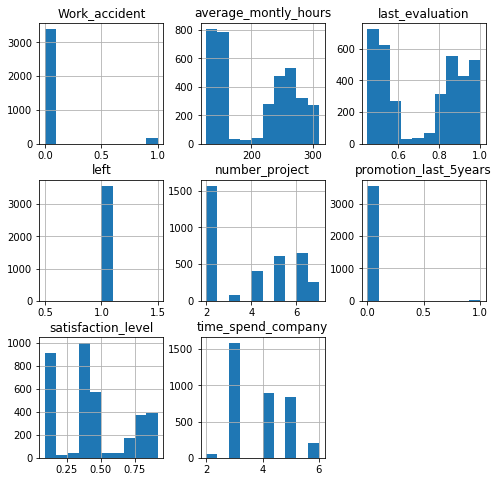

In [19]:
df_left.hist(figsize=(8,8))

In [20]:
df_left.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.0,3571.000000
mean,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321
std,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.0,0.072759
min,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,1.0,0.000000
25%,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,1.0,0.000000
50%,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,1.0,0.000000
75%,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,1.0,0.000000
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.0,1.000000


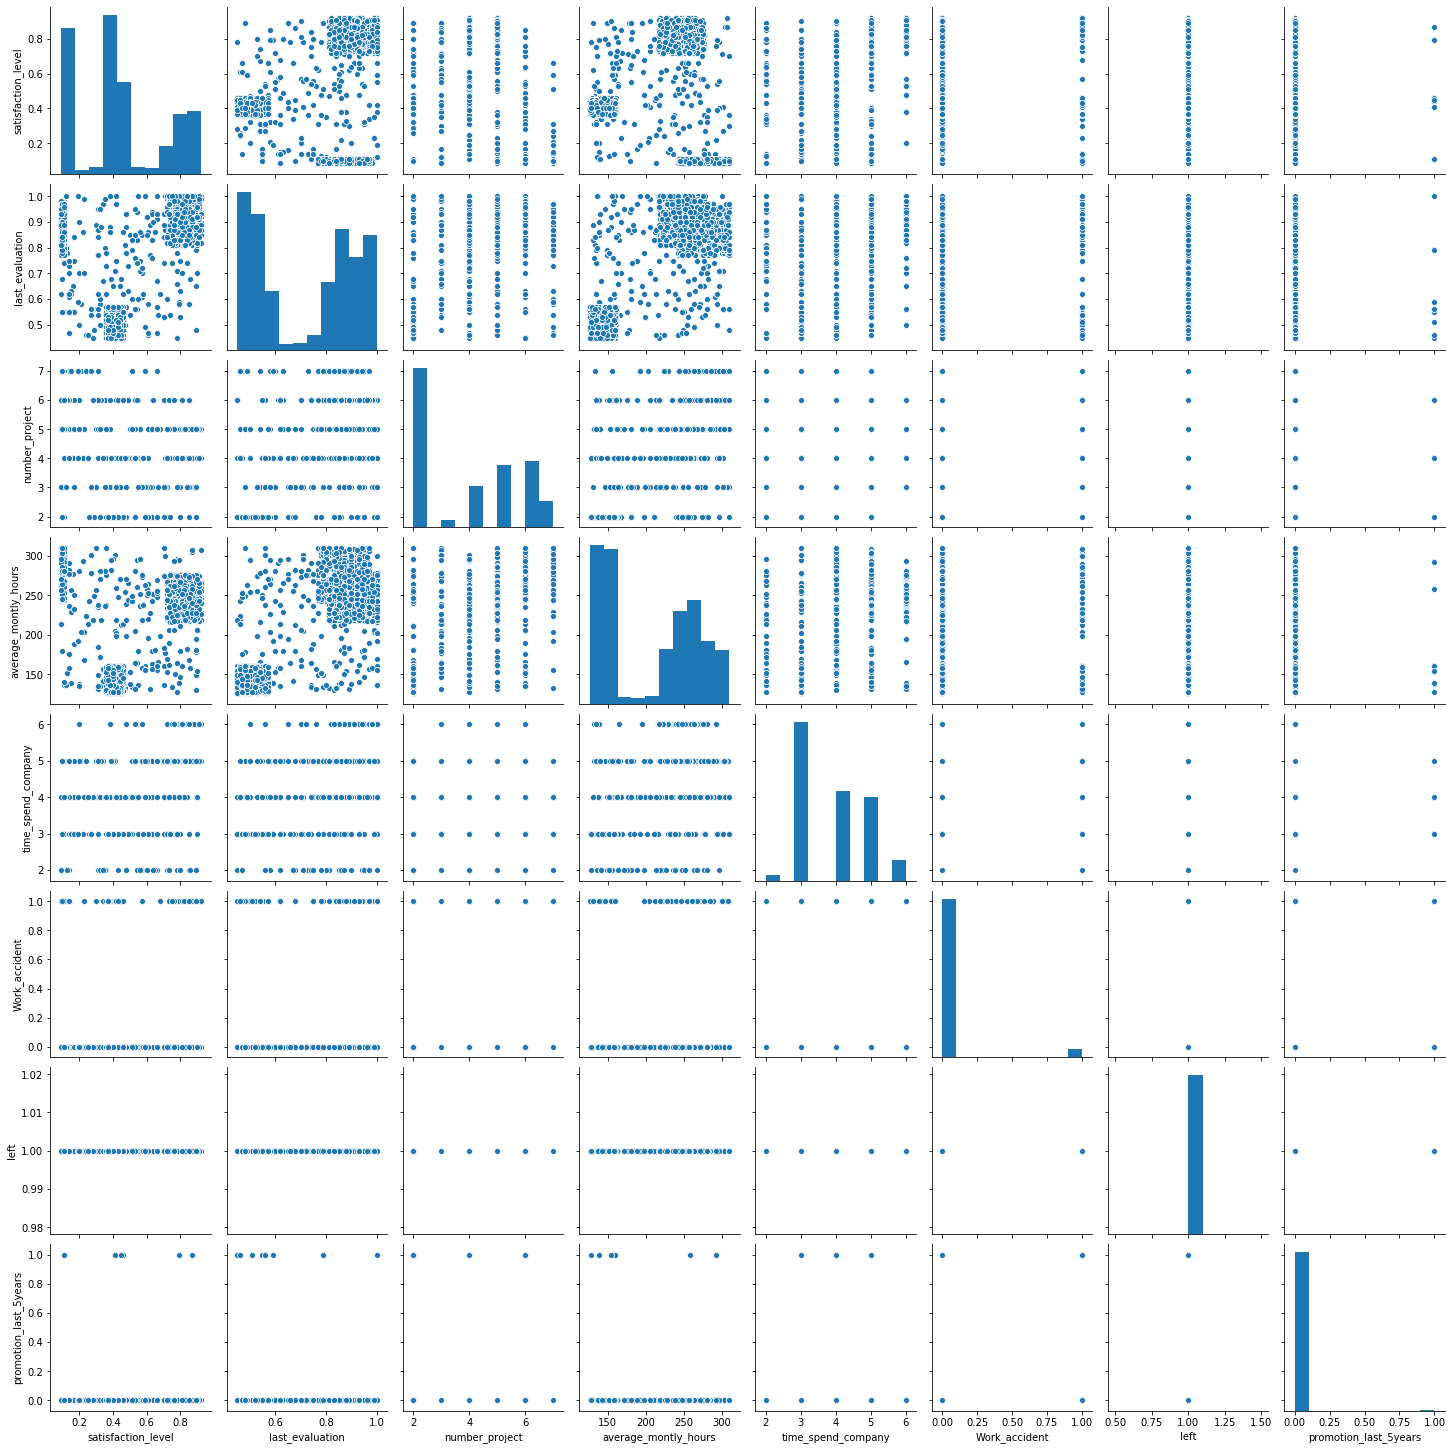

In [21]:
sns.pairplot(df_left)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020966A53D08>,
      dtype=object)

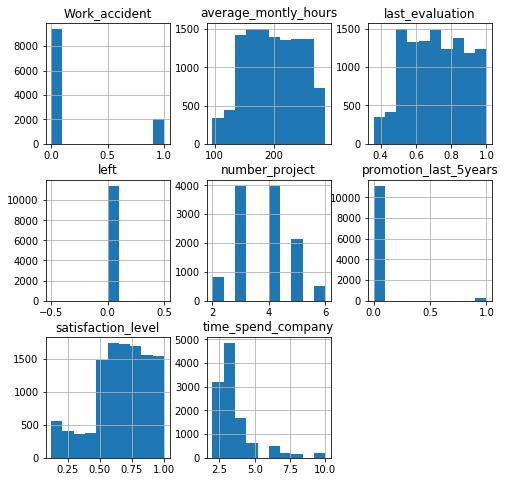

In [22]:
df_now.hist(figsize=(8,8))

In [23]:
df_now.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.0,11428.000000
mean,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.0,0.026251
std,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.0,0.159889
min,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.0,0.000000
25%,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.0,0.000000
50%,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.0,0.000000
75%,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.0,0.000000
max,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,0.0,1.000000


In [24]:
a = len(df_left[df_left['promotion_last_5years']==1])
b = len(df_left[df_left['time_spend_company']>=5])
print(f'Количество повышений среди сотрудников, покинувших компанию: {a}')
print(f'Количество покинувших компанию сотрудников: {b}')
print(f'Процент повышений: {round(100*a/b)}%')
# сделаем из данного кода функцию

Количество повышений среди сотрудников, покинувших компанию: 19
Количество покинувших компанию сотрудников: 1042
Процент повышений: 2%


In [25]:
#Сравним в выборке ушедших и оставшихся сотрудников, стаж которых больше 5 лет.
def percent_promotion_last_5years(data):
    a = data[data['promotion_last_5years']==1]
    b = data[data['time_spend_company']>=5]
    c = b['average_montly_hours'].mean()
    d = b['last_evaluation'].mean()
    print(f'Количество повышений среди сотрудников: {len(a)}')
    print(f'Количество сотрудников со стажем больше 5 лет: {len(b)}')
    print(f'Процент повышений: {round(100*len(a)/len(b))}%')
    print(f'Средние часы работы в месяц: {round(c)}')
    print(f'Средняя оценка данной выборки: {round(d,3)}')

In [26]:
percent_promotion_last_5years(df_left)

Количество повышений среди сотрудников: 19
Количество сотрудников со стажем больше 5 лет: 1042
Процент повышений: 2%
Средние часы работы в месяц: 246
Средняя оценка данной выборки: 0.902


In [27]:
percent_promotion_last_5years(df_now)

Количество повышений среди сотрудников: 300
Количество сотрудников со стажем больше 5 лет: 1713
Процент повышений: 18%
Средние часы работы в месяц: 197
Средняя оценка данной выборки: 0.701


In [28]:
a = df_left[df_left['time_spend_company']==5]
b = len(df_left)
c = a[a['promotion_last_5years']==1]
d = df_left[df_left['time_spend_company']<5]
print(f'Ушли из компании на пятилетнем стаже {len(a)} человек из {b}, из них повысили всего {len(c)}')
print(f'Ушли из компании со стажем меньшим чем 5 лет {len(d)} человек')

Ушли из компании на пятилетнем стаже 833 человек из 3571, из них повысили всего 1
Ушли из компании со стажем меньшим чем 5 лет 2529 человек


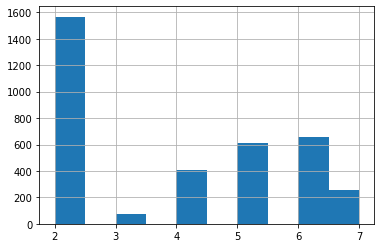

In [29]:
#Проверим из каких проектов в основном уходили 
df_left['number_project'].hist()

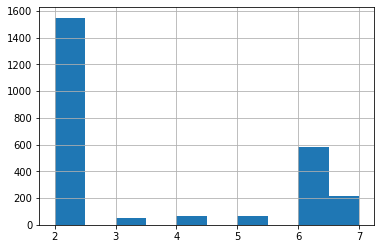

In [30]:
d['number_project'].hist()

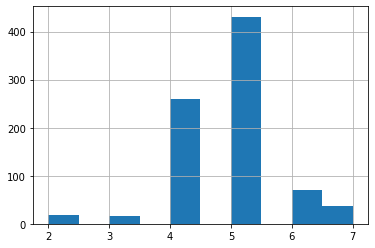

In [31]:
df_left[df_left['time_spend_company']==5]['number_project'].hist()#проекты из которых уходят сотрудники со стажем равным пяти годам

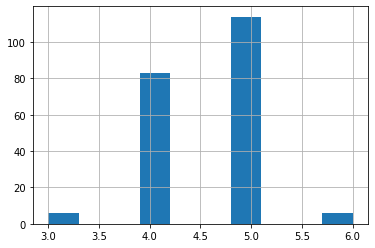

In [32]:
df_left[df_left['time_spend_company']>5]['number_project'].hist()#проекты из которых уходят сотрудники со стажем больше пяти лет

0.9047368421052625
0.9010324129651871
0.642439699485959


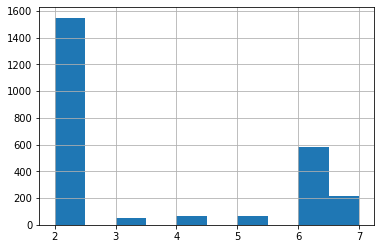

In [33]:
print(df_left[df_left['time_spend_company']>5]['last_evaluation'].mean())#средняя оценка сотрудников, со стажем больше 5 лет довольно высока
print(df_left[df_left['time_spend_company']==5]['last_evaluation'].mean())# аналогично и с пятилетним стажем
print(df_left[df_left['time_spend_company']<5]['last_evaluation'].mean()) # у сотрудников стаж которых меньше 5 лет, оценка пониже
df_left[df_left['time_spend_company']<5]['number_project'].hist()# и большинство "новичков" уходит из 2 проекта

#со стажем до 5 лет в основном уходили из 2 проекта, те у кого стаж больше или равен 5 годам - уходили 

In [34]:
m1 = df_left[df_left['time_spend_company']>=5]['last_evaluation'].mean()
print(f'Средняя оценка ушедших со стажем больше или равным 5 годам : {m1}')
m2 = df_now[(df_now['time_spend_company']>=5) & (df_now['promotion_last_5years']==1)]['last_evaluation'].mean()
print(f'Средняя оценка сотрудников, получивших повышение : {m2}')

Средняя оценка ушедших со стажем больше или равным 5 годам : 0.9017754318618059
Средняя оценка сотрудников, получивших повышение : 0.6690526315789475


## Вывод:
Если сравнивать таблицы и графики двух разделенных датасетов, то получается что у ушедших уровень удовлетворенности был меньше, чем у оставшихся(медиана 0,41 и 0,69 соответственно), средних часов работы в месяц у ушедших больше. Повышений за 5 лет очень мало у ушедших, особенно у тех, у кого ровно 5 лет стаж, а оценка работы у них высокая.
Из последнего сравнения видно, что уходят сотрудники, которые много работают, оценка работы выше, а повышений по итогу нет.
В 4 и 5 проекте не повышают сотрудников со стажем больше 5 лет включительно
Новички убегают из 2 проекта, из 6 и 7 тоже уходят, в основном те, у кого стаж меньше или равен пяти, те, у кого равен пяти уходят видимо из-за того, что не повысили по результату 5 лет, а оценка работы у них очень высокая.
Итог: пересмотреть политику отношения к новичкам, ответственным за 2 проект(если конечно туда специально не определяют изначально слабых сотрудников)
в 4 и 5 проекте пересмотреть отношение к итоговому повышению(может пишут слабую рецензию сотрудникам или не выдвигают на повышение), средняя оценка у них выше, чем у тех, кого повысили и кто остался.

## №5
С использованием t-test статистики проверить взаимосвязи между несколькими переменными

In [35]:
#Нулевая гипотеза, что средний показатель общего уровня удовлетворенности не отличается от среднего уровня удовлетворенности тех, кто ушел
from scipy import stats
mean_satisfaction_level_left = df_left['satisfaction_level']
mean_satisfaction_level = df['satisfaction_level']
stats.ttest_1samp(mean_satisfaction_level_left, df['satisfaction_level'].mean())

Ttest_1sampResult(statistic=-39.10948894348446, pvalue=9.012781195378076e-279)

p-value намного меньше стандартной альфа ошибки 0.05, поэтому мы отвергаем нулевую гипотезу о том, средний уровень удовлетворенности ушедших не отличается от общего среднего уровня удовлетворенности, а следовательно между уходом и уровнем удовлетворенности есть зависимость.

In [36]:
#Нулевая гипотеза   -  нет зависимости между проектами и уходом из компании
left = df_left['number_project']
now =  df_now['number_project']

print(stats.ttest_ind(left, now))

Ttest_indResult(statistic=2.9138564358459607, pvalue=0.0035752138709418788)


p-value меньше стандартной альфа ошибки 0.05, поэтому отвергаем нулевую гипотезу, а следовательно есть зависимость между уходом и номером проекта.

In [37]:
#Нулевая гипотеза   -  уход из компании не зависит от стажа работы. Для этого разделим всех на три группы, до 5 лет, равным 5 годам и больше 5 лет
experience_less_5 = df[df['time_spend_company']>5]['left']
experience_5 = df[df['time_spend_company']==5]['left']
experience_more_5 = df[df['time_spend_company']<5]['left']
stats.f_oneway(experience_less_5, experience_5, experience_more_5)

F_onewayResult(statistic=522.7161808866031, pvalue=3.553777795066701e-220)

p-value намного меньше стандартной альфа ошибки 0.05, поэтому мы отвергаем нулевую гипотезу, а следовательно есть зависимость между стажем(группой по стажу) и уходом из компании

## № 6 
Рассчитать сколько работников работает в каждом департаменте(проекте)?

In [38]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [39]:
lavel_sales = df[df['left']==0]['sales'].value_counts()
lavel_sales

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: sales, dtype: int64

## № 7
Показать распределение сотрудников по зарплатам

In [40]:
dep = df[df['left']==0]['salary'].value_counts()
dep


low       5144
medium    5129
high      1155
Name: salary, dtype: int64

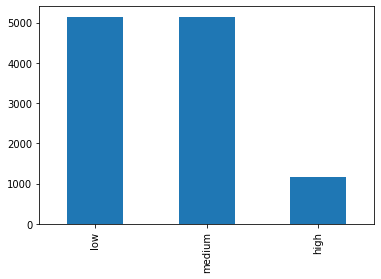

In [41]:
dep.plot(kind='bar')

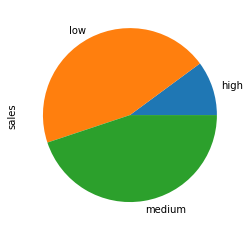

In [42]:
#или так
level_salary = df_now.groupby([ 'salary']).count()['sales']
level_salary
level_salary.plot(kind='pie', y='Count')

## № 8
Показать распределение сотрудников по зарплатам совместно с департаментами

In [44]:
df_now[(df_now['salary']=='medium') & (df_now['sales']=='technical')].count()#сделаем отбор по одному отделу и зарплате для самопроверки

satisfaction_level       853
last_evaluation          853
number_project           853
average_montly_hours     853
time_spend_company       853
Work_accident            853
left                     853
promotion_last_5years    853
sales                    853
salary                   853
dtype: int64

In [55]:
df_group = df_now.groupby(['sales','salary']).count()['left']#сгруппируем по двум признакам, сверим с числом выше

In [56]:
df_group

sales        salary
IT           high        79
             low        437
             medium     438
RandD        high        47
             low        309
             medium     310
accounting   high        69
             low        259
             medium     235
hr           high        39
             low        243
             medium     242
management   high       224
             low        121
             medium     194
marketing    high        71
             low        276
             medium     308
product_mng  high        62
             low        346
             medium     296
sales        high       255
             low       1402
             medium    1469
support      high       133
             low        757
             medium     784
technical    high       176
             low        994
             medium     853
Name: left, dtype: int64

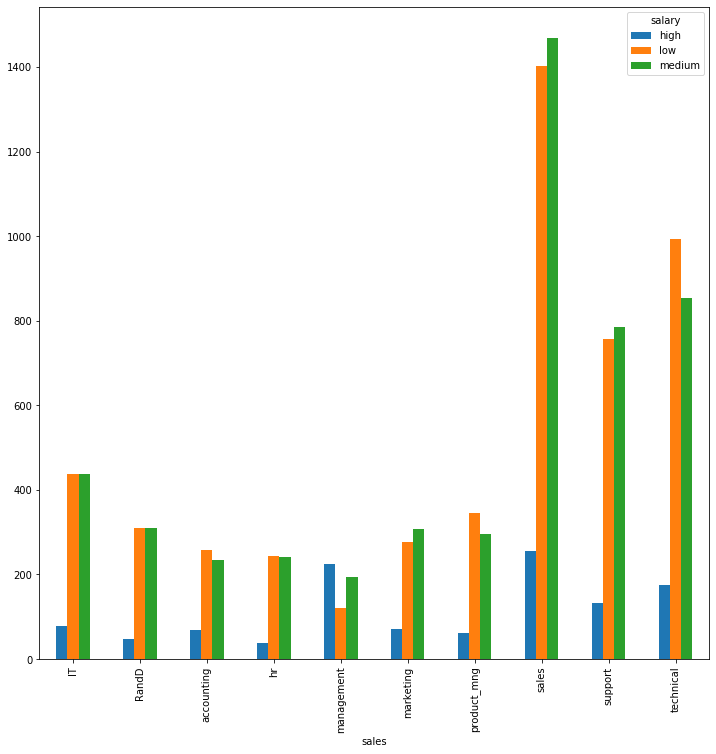

In [60]:
df_group.unstack().plot(kind='bar',figsize=(12,12))#построим график, увеличив при этом размер